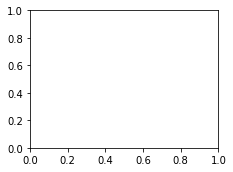

In [1]:
import os
import sys
import numpy as np
import d00_utils.input_text as di
import d00_utils.read_log as dr
import d00_utils.data_for_plot as ddfp
import d00_utils.plot as dp
import d00_utils.check_error as dc
import d00_utils.calculate_new_variable as dcn
import matplotlib.pyplot as plt
lmp_folder_path = di.lmp_folder_path
# pickle variable
(log_variable_dic_list, n_simu_total, log_variable, folder_path_list_initial_to_last) = dr.dump_variable(lmp_folder_path)

n_ave = 51
inputstepsarray = np.array([2000000, 4000000, 5500000, 10000000, 20000000, 65000000])
inputstepsarray_conti = np.arange(15000000,74000000,10000)
index = np.s_[:,3,3]
stepsarray = np.arange(15000000,74000000,10000)
n_ave_coord1 = 8
n_ave_coord2 = 8
i = 1
j = 2



In [38]:
def plot_muij_Iij(i,j,n_ave,inputstepsarray, index):
    fig, axs = plt.subplots()
    axs.plot(
        -dcn.I_ij(i,j,n_ave, inputstepsarray,log_variable_dic_list)[index].reshape(-1),
        -dcn.mu_ij(i,j,n_ave, inputstepsarray,log_variable_dic_list)[index].reshape(-1),
        marker = ".",
        linestyle = 'None',
        markersize=12,
        )
def plot_mu_I(n_ave,inputstepsarray, index):
    fig, axs = plt.subplots()
    axs.plot(
        dcn.I(n_ave, inputstepsarray,log_variable_dic_list)[index].reshape(-1),
        dcn.mu(n_ave, inputstepsarray,log_variable_dic_list)[index].reshape(-1),
        marker = ".",
        linestyle = 'None',
        markersize=12,
        )
def plot_variable(variable, inputstepsarray, index):
    fig, axs = plt.subplots()
    axs.plot(
        variable[index].reshape(-1),
        marker = ".",
        linestyle = 'None',
        markersize=12,
        )

fraction = ddfp.get_ave_value(n_ave, 'avspatial_ave', 'fraction', inputstepsarray, log_variable_dic_list, is_calculated_v=True)
fraction_ave = ave_4_grid_for_the_last_axis(fraction)

def ratio_stress_strain_rate_deviator(i, j, n_ave, inputstepsarray,ifcorrect_by_ave_velocity=True, ifcorrect_by_wall=True):
    strain_rate = dcn.strain_rate_tensor_deviator(i, j, n_ave, inputstepsarray)
    stress = dcn.stress_tensor_deviator(i, j, n_ave, inputstepsarray, ifcorrect_by_ave_velocity=ifcorrect_by_ave_velocity, ifcorrect_by_wall=ifcorrect_by_wall)
    return stress/strain_rate


In [39]:
index = np.s_[-1,0,5:10]
dcn.I_ij(i,j,n_ave, inputstepsarray,log_variable_dic_list)[index].reshape(-1)

array([-0.00250342, -0.00269673, -0.00328138, -0.00352368, -0.00371273])

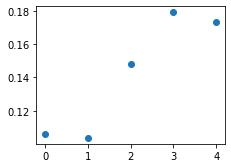

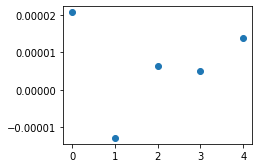

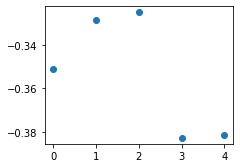

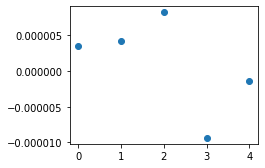

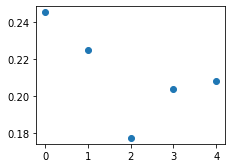

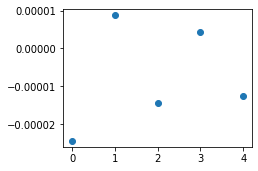

In [40]:
for (i,j) in [
    (1,1),
    (2,2),
    (3,3),
]:
    plot_variable(
        dcn.mu_ij(i,j, 201, inputstepsarray,log_variable_dic_list), inputstepsarray, index,
    )
    plot_variable(
        dcn.I_ij(i,j, 201, inputstepsarray,log_variable_dic_list), inputstepsarray, index,
    )


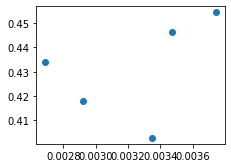

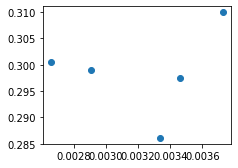

In [19]:
index = np.s_[-1,0,5:10]
plot_mu_I(201,inputstepsarray,index)
plot_muij_Iij(1,2,201,inputstepsarray,index)

In [7]:
index = np.s_[-1,-2,5:10]
plot_mu_I(201,inputstepsarray,index)
plot_muij_Iij(1,2,201,inputstepsarray,index)

NameError: name 'plot_mu_I' is not defined

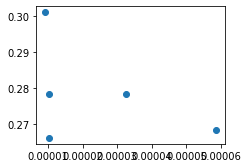

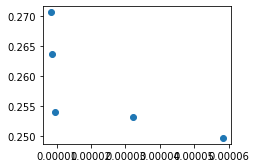

In [1338]:
index = np.s_[-1,5:10,5]
plot_mu_I(201,inputstepsarray,index)
plot_muij_Iij(1,2,201,inputstepsarray,index)

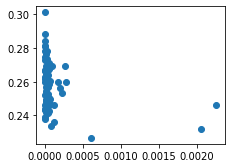

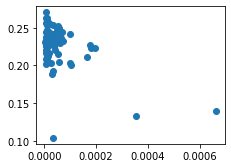

In [1343]:
index = np.s_[-1,5:10,2:-2]
plot_mu_I(201,inputstepsarray,index)
plot_muij_Iij(1,2,201,inputstepsarray,index)


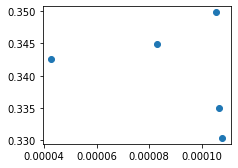

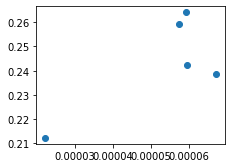

In [1355]:
index = np.s_[-4,-1,5:10]
plot_mu_I(51,inputstepsarray,index)
plot_muij_Iij(1,2,51,inputstepsarray,index)

In [1349]:
inputstepsarray

array([ 2000000,  4000000,  5500000, 10000000, 20000000, 65000000])

In [41]:
index=np.s_[-1,5:10,5]
plot_variable(
    ratio_stress_strain_rate_deviator(1,2, 201, inputstepsarray),
    inputstepsarray, index,
)
plot_variable(
    stress_tensor_deviator(1,2, 201, inputstepsarray),
    inputstepsarray, index,
)
plot_variable(
    strain_rate_tensor_deviator(1,2, 201, inputstepsarray),
    inputstepsarray, index,
)
plot_variable(
    ratio_stress_strain_rate_deviator(2,3, 201, inputstepsarray),
    inputstepsarray, index,
)
plot_variable(
    stress_tensor_deviator(2,3, 201, inputstepsarray),
    inputstepsarray, index,
)
plot_variable(
    strain_rate_tensor_deviator(2,3, 201, inputstepsarray),
    inputstepsarray, index,
)

TypeError: strain_rate_tensor_deviator() missing 1 required positional argument: 'log_variable_dic_list'

In [43]:
fig, axs = plt.subplots()
axs.plot(
    dcn.I(n_ave, inputstepsarray)[-1][:2,:8],
    dcn.mu(n_ave, inputstepsarray)[-1][:2,:8],
    marker = ".",
    linestyle = 'None',
    markersize=12,
    )

TypeError: I() missing 1 required positional argument: 'log_variable_dic_list'

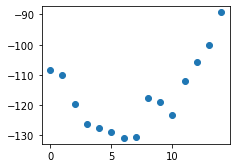

In [1126]:
fig, axs = plt.subplots()
axs.plot(
    stress_tensor_deviator(1,2,n_ave, inputstepsarray)[-1,:,2],
    marker = ".",
    linestyle = 'None',
    markersize=12,
    )

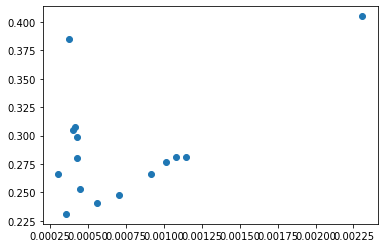

In [1206]:
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(
    I(n_ave, inputstepsarray)[-1,:,1],
    mu(n_ave, inputstepsarray)[-1,:,1],
    marker = ".",
    linestyle = 'None',
    markersize=12,
    )

(<Figure size 243x182.25 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f466edd8ba8>)

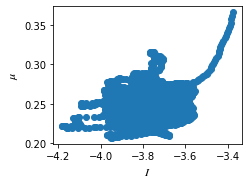

In [7]:
dp.plot_mu_I(
    51, 1, 1, np.arange(5300000,74000000,10000), log_variable_dic_list, np.s_[:,3,3],
    r'$I$', r'$\mu$',
    ignore_diagonal=False,
)

(<Figure size 243x182.25 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f466c9c32e8>)

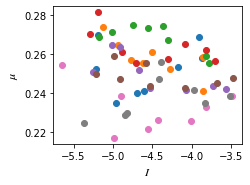

In [15]:
dp.plot_mu_I(
    51, 1, 1, np.arange(73000000,74000000,10000), log_variable_dic_list, np.s_[-1,3:11,3:11],
    r'$I$', r'$\mu$',
    ignore_diagonal=True,
)

(<Figure size 243x182.25 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f466eb1b390>)

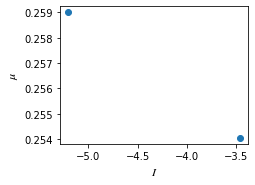

In [13]:
dp.plot_mu_I(
    51, 1, 1, np.arange(5300000,74000000,10000), log_variable_dic_list, np.s_[-1,3:11:7,8],
    r'$I$', r'$\mu$',
    ignore_diagonal=False,
)

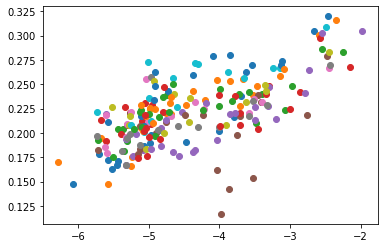

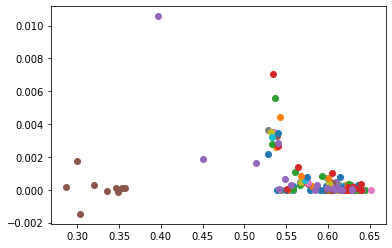

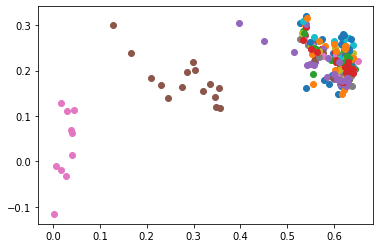

In [1181]:
fraction = ddfp.get_ave_value(n_ave, 'avspatial_ave', 'fraction', inputstepsarray, log_variable_dic_list, is_calculated_v=True)
fraction_ave = ave_4_grid_for_the_last_axis(fraction)
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(
    np.log10(-I_ij(1,2,n_ave, inputstepsarray)[-1,:,:]),
    -mu_ij(1,2,n_ave, inputstepsarray)[-1,:,:],
    marker = ".",
    linestyle = 'None',
    markersize=12,
    )

fig, axs = plt.subplots(figsize=(6,4))
axs.plot(
    fraction_ave[-1,:,:],
    -I_ij(1,2,n_ave, inputstepsarray)[-1,:,:],
    marker = ".",
    linestyle = 'None',
    markersize=12,
    )

fig, axs = plt.subplots(figsize=(6,4))
axs.plot(
    fraction_ave[-1,:,:],
    -mu_ij(1,2,n_ave, inputstepsarray)[-1,:,:],
    marker = ".",
    linestyle = 'None',
    markersize=12,
    )

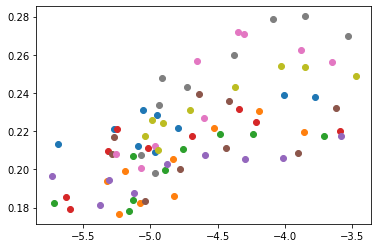

In [1215]:
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(
    np.log10(-I_ij(1,2,n_ave, inputstepsarray))[-2,3:-3,3:12],
    -mu_ij(1,2,n_ave, inputstepsarray)[-2,3:-3,3:12],
    marker = ".",
    linestyle = 'None',
    markersize=12,
    )

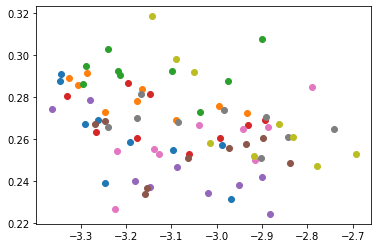

In [1213]:
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(
    np.log10(I(n_ave, inputstepsarray)[-1,3:-3,3:12]),
    mu(n_ave, inputstepsarray)[-1,3:-3,3:12],
    marker = ".",
    linestyle = 'None',
    markersize=12,
    )

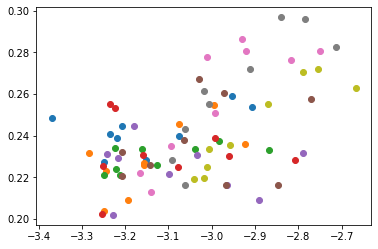

In [1214]:
fig, axs = plt.subplots(figsize=(6,4))
axs.plot(
    np.log10(I(n_ave, inputstepsarray)[-2,3:-3,3:12]),
    mu(n_ave, inputstepsarray)[-2,3:-3,3:12],
    marker = ".",
    linestyle = 'None',
    markersize=12,
    )